### Usage example

In [1]:
import sys
import os
import matplotlib.pyplot as plt
# Añadir el directorio anterior al PYTHONPATH
script_path = os.path.abspath('../')
if script_path not in sys.path:
    sys.path.append(script_path)

# Importar el módulo script_con_funciones
from metricasCalidadAudio import *

Volumen total : 5735 
Entropía total: 1.3959036589004608 
Porcentaje medio de frecuencias bajas: 7.679755915897861 % 
Entropía de frecuencias bajas: 1.3959036589004608 
Tipo de canal: Estéreo sólo izquierdo 
Silencios intermedios: [] 
Distorsiones: [4.416666666666667, 4.583333333333333, 8.083333333333334, 11.083333333333334]


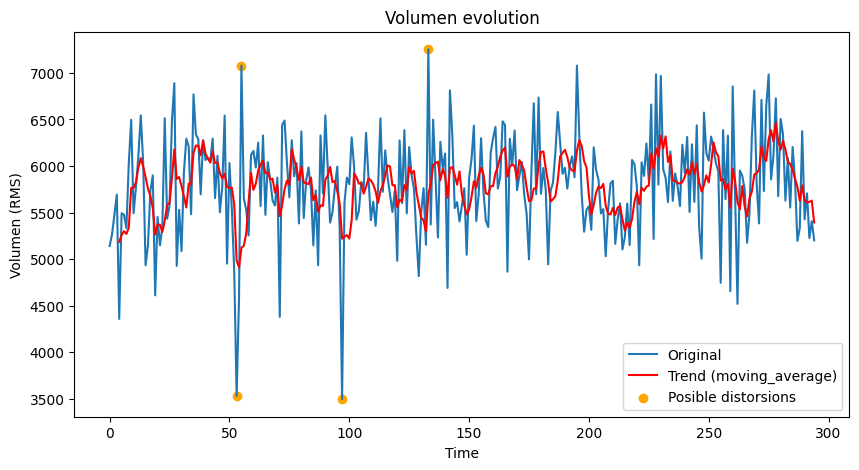

In [6]:
audio_path = f"../../audios_de_trabajo/{'03JjCF4I'}.mp3" #### Directorio en donde estén los audios de las clases
sound = AudioSegment.from_mp3(audio_path)

signal = sound2signal(sound)
entropia_total = calculate_entropy(signal)
MAE, filtered_signal_desnorm = ruidoIndicador_normalized(signal)
signal_entropy = calculate_entropy(signal)
lowFrequencies_entropy =  calculate_entropy(filtered_signal_desnorm)
tipo_canal = analizar_canales(sound)
silenciosIntermedios = detectar_silenciosIntermedios(sound)
distorsiones = detectar_distorsiones(sound)

print('Volumen total :', sound.rms,
    '\nEntropía total:', entropia_total,
'\nPorcentaje medio de frecuencias bajas:', MAE*100,'%',
'\nEntropía de frecuencias bajas:', lowFrequencies_entropy,
'\nTipo de canal:', tipo_canal,
'\nSilencios intermedios:', silenciosIntermedios,
'\nDistorsiones:', distorsiones
)

############## Graficar evolución del volumen ##############
chunk_length = 5000  #Buscamos de 5 en 5 segundos si hay volúmenes bajos
chunks = make_chunks(sound,chunk_length = chunk_length)
rms_s = [i.rms for i in chunks]
rms_s = rms_s[:-12] #Eliminar últimos 12 equivalentes a los últimos 60 segs
rms_s = rms_s[12:] # Eliminar primeros 12 equivalentes a los primeros 60 segs
# Aplicar la media móvil
window_size = int(chunk_length/1000)
moving_avg = moving_average(rms_s, window_size)
moving_avg_full = [None] * (window_size - 1) + moving_avg
residuos = [rms_s[i] - moving_avg_full[i] for i in range(len(rms_s)) if moving_avg_full[i] is not None]
mean_residuos = np.mean(residuos)
std_residuos = np.std(residuos)
outliers = [(i, rms_s[i]) for i in range(len(rms_s)) if moving_avg_full[i] is not None and abs(rms_s[i] - moving_avg_full[i]) > 3 * std_residuos]
plt.figure(figsize=(10, 5))
plt.plot(rms_s, label='Original')
plt.plot(moving_avg_full, label='Trend (moving_average)', color='red')
plt.scatter(*zip(*outliers), color='orange', label='Posible distorsions')
plt.title('Volumen evolution')
plt.ylabel('Volumen (RMS)')
plt.xlabel('Time')
plt.legend()
plt.show()